In [1]:
%load_ext watermark
%watermark -a 'cs224' -u -d -v -p numpy,xarray,scipy,pandas,sklearn,matplotlib,seaborn,pymc3

cs224 
last updated: 2020-05-01 

CPython 3.6.10
IPython 7.13.0

numpy 1.18.1
xarray 0.15.0
scipy 1.4.1
pandas 1.0.2
sklearn 0.22.1
matplotlib 3.1.3
seaborn 0.10.0
pymc3 3.8


In [2]:
%matplotlib inline
import numpy as np, scipy, scipy.stats as stats, scipy.special, scipy.misc, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, xarray as xr
import matplotlib as mpl

import pymc3 as pm

import theano as thno
import theano.tensor as T

import sklearn, sklearn.linear_model

import datetime, time, math
from dateutil import relativedelta

from collections import OrderedDict

SEED = 42
np.random.seed(SEED)

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=1000)
np.set_printoptions(suppress=True)
np.core.arrayprint._line_width = 180

sns.set()
# sns.set_style("whitegrid")

In [3]:
from IPython.display import display, HTML

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        if type(df) == np.ndarray:
            df = pd.DataFrame(df)
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline"')
    # print(html_str)
    display_html(html_str,raw=True)

CSS = """
.output {
    flex-direction: row;
}
"""

def display_graphs_side_by_side(*args):
    html_str='<table><tr>'
    for g in args:
        html_str += '<td>'
        html_str += g._repr_svg_()
        html_str += '</td>'
    html_str += '</tr></table>'
    display_html(html_str,raw=True)
    

display(HTML("<style>.container { width:70% !important; }</style>"))

In [4]:
%load_ext autoreload
%autoreload 1
%aimport covid19

In [71]:
alternative_germany_data = covid19.get_rki_df()
cbr_germany1 = covid19.CasesByRegion('Germany', df=alternative_germany_data)
cbr_germany1.tail()

,confirmed,recovered,death,new_confirmed,new_recovered,new_death
index,,,,,,
2020-04-26,157630,126687,5736,578,0,69
2020-04-27,158482,126687,5842,852,0,106
2020-04-28,159308,126685,6054,826,-2,212
2020-04-29,160130,126684,6256,822,-1,202
2020-04-30,160648,126683,6400,518,-1,144


In [70]:
cbr_germany2 = covid19.CasesByRegion('Germany') #, df=alternative_germany_data
cbr_germany2.tail()

,confirmed,recovered,death,new_confirmed,new_recovered,new_death
2020-04-26,155499,112300,5736,893,2500,69
2020-04-27,156234,114500,5842,735,2200,106
2020-04-28,157552,117400,6054,1318,2900,212
2020-04-29,159026,120400,6256,1474,3000,202
2020-04-30,160481,123500,6400,1455,3100,144


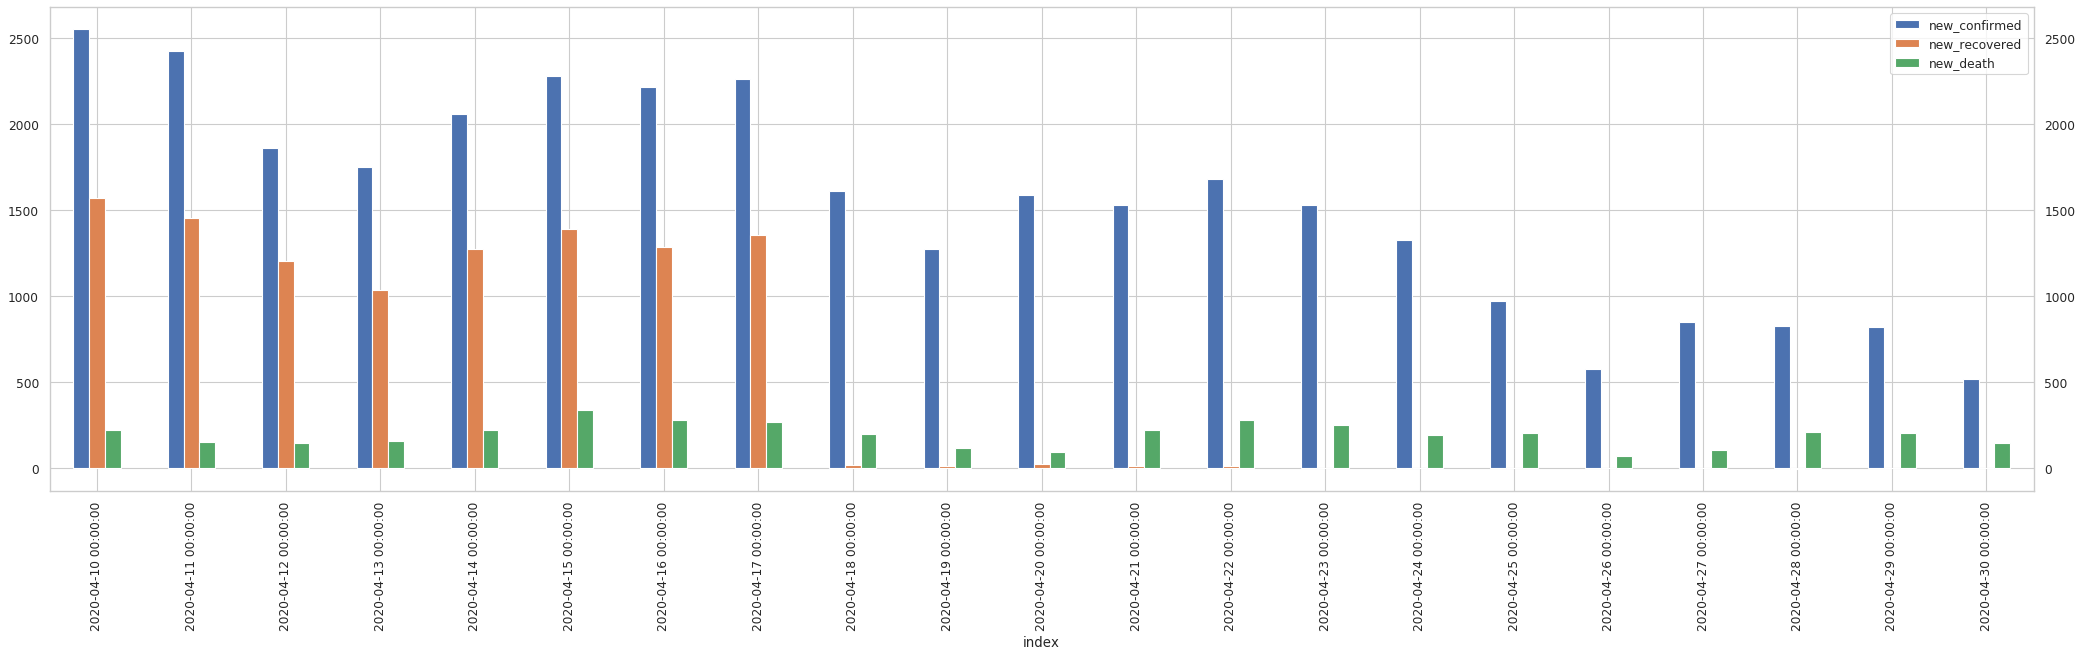

In [72]:
cbr_germany1.plot_daily_stats()

sigmoid+asymmetric: seor: 515.8862773962996, max asymptotic: 176154.07027349848; growth-rate: 0.007, date:2020-06-06 00:00:00, projected value: 90.00832724033003


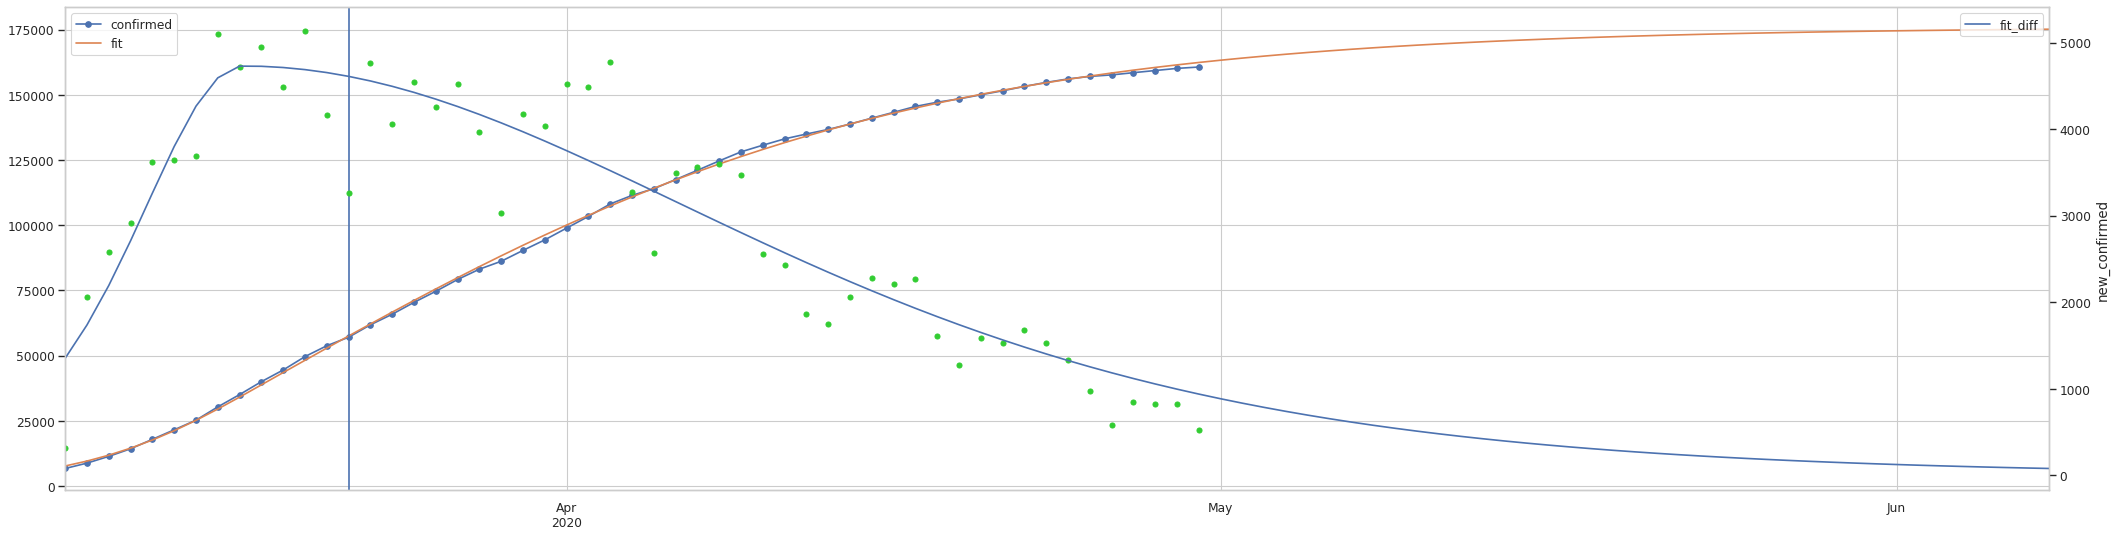

In [73]:
cbr_germany1.fit(first_date=pd.to_datetime('2020-03-09'))
fig = plt.figure(figsize=(32,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)
cbr_germany1.plot_with_fits(ax=ax, restriction_start_date=datetime.datetime(2020, 3, 22))

 /home/local/cs/workspaces/covid-19-data-analysis/covid19.py:1502: UserWarning:Exception in curve_fit: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
 /home/local/cs/local/install/anaconda3-5.3.1-Linux-x86_64/envs/py36ds/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning:Covariance of the parameters could not be estimated


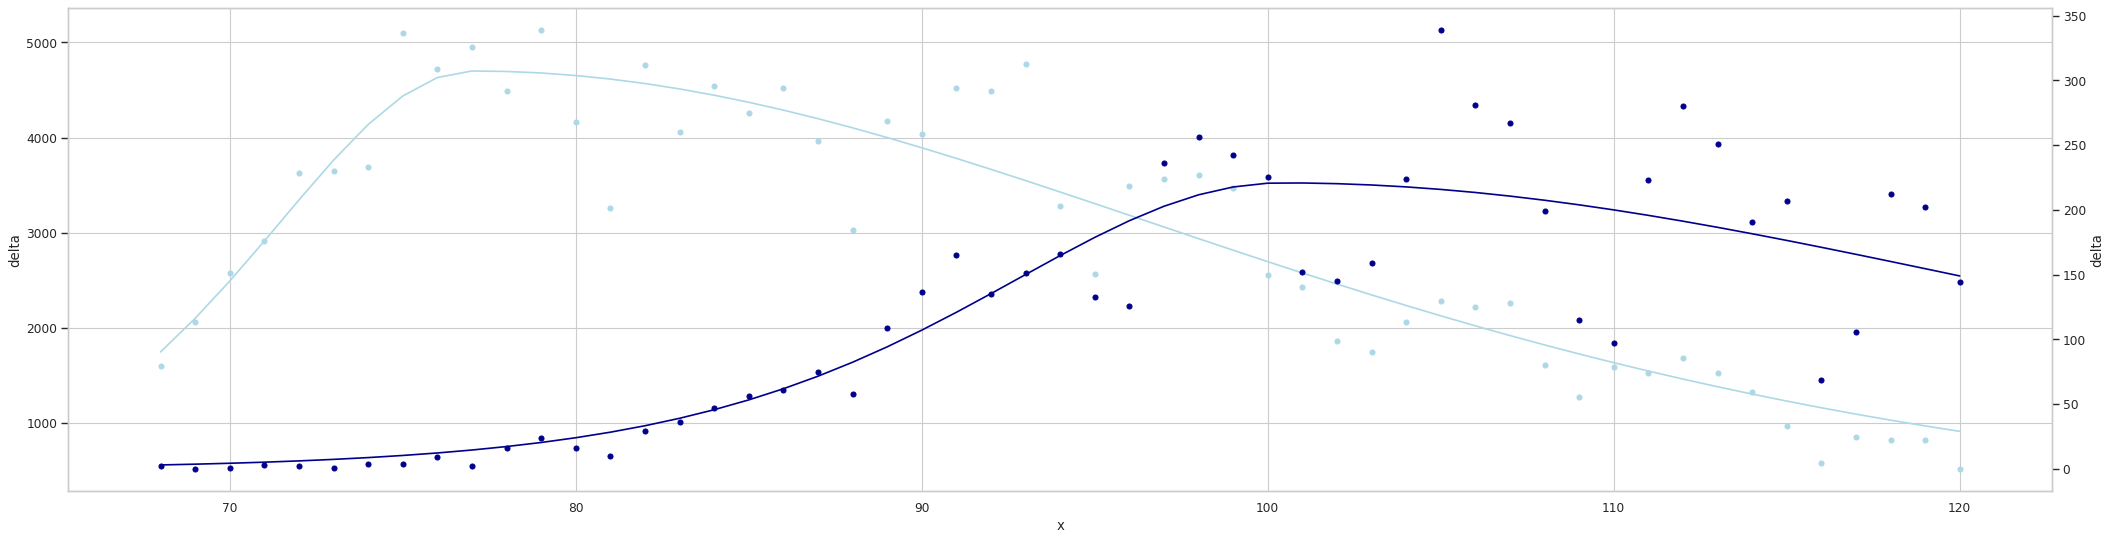

In [217]:
ll1 = covid19.LeadLagByShiftAndScale1(cbr_germany1.df['confirmed'], cbr_germany1.df['death'], first_date=pd.to_datetime('2020-03-09'))
ll1.fit()
ll1.plot_lead_lag()

In [218]:
ll1.fc_follower.fit_overview()

[exp: seor: 69.18374385059509, popt: [147.57754552   0.03337063],
 sigmoid: seor: 46.91781053232265, popt: [7484.21794796    0.12499826  -13.16994462],
 sigmoid+linear: seor: inf, popt: [ -0.6056265    0.30614541 -27.12621583 658.1344125 ],
 sigmoid+asymmetric: seor: 46.254648124597395, popt: [5083.88499763    0.17376744    0.06607757  -17.44389533],
 sigmoid+asymmetric+linear: seor: 48.67404775419193, popt: [ 81.47295037   0.28022729   0.36171861 -24.66000143 553.03214225]]

In [207]:
lf = ll1.fc_follower.fit_choices[1]
print(lf.p0)
lf

[9081.0, 0.2, -50]


sigmoid: seor: 46.91781052521017, max asymptotic: 6631.908362631492

In [209]:
lf1 = lf
lf1.x

index
2020-03-09     68.0
2020-03-10     69.0
2020-03-11     70.0
2020-03-12     71.0
2020-03-13     72.0
2020-03-14     73.0
2020-03-15     74.0
2020-03-16     75.0
2020-03-17     76.0
2020-03-18     77.0
2020-03-19     78.0
2020-03-20     79.0
2020-03-21     80.0
2020-03-22     81.0
2020-03-23     82.0
2020-03-24     83.0
2020-03-25     84.0
2020-03-26     85.0
2020-03-27     86.0
2020-03-28     87.0
2020-03-29     88.0
2020-03-30     89.0
2020-03-31     90.0
2020-04-01     91.0
2020-04-02     92.0
2020-04-03     93.0
2020-04-04     94.0
2020-04-05     95.0
2020-04-06     96.0
2020-04-07     97.0
2020-04-08     98.0
2020-04-09     99.0
2020-04-10    100.0
2020-04-11    101.0
2020-04-12    102.0
2020-04-13    103.0
2020-04-14    104.0
2020-04-15    105.0
2020-04-16    106.0
2020-04-17    107.0
2020-04-18    108.0
2020-04-19    109.0
2020-04-20    110.0
2020-04-21    111.0
2020-04-22    112.0
2020-04-23    113.0
2020-04-24    114.0
2020-04-25    115.0
2020-04-26    116.0
2020-04-27    

In [173]:
lf.p0 = [9081.0, 0.2, -10.0]
# lf.p0 = [9081.0, 0.1, -10.0]
# lf.p0 = [7484.20342724, 0.12499867, -10.54501507]
# lf.p0 = [9081.0, 0.12, -10.0]
lf.p0

[9081.0, 0.2, -10.0]

In [174]:
bounds=[(1000.0,np.inf),(0.01,np.inf),(-np.inf, -0.1)]
bl = [i[0] for i in bounds]
bu = [i[1] for i in bounds]
bounds_ = (bl, bu)
bounds_

([1000.0, 0.01, -inf], [inf, inf, -0.1])

In [180]:
covid19.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  lf.p0, 'xyz', bounds=bounds)

xyz: seor: 46.91781053232265, popt: [7484.21794796    0.12499826  -13.16994462]

In [177]:
# lf.fit()
# lf.f_derivative.popt
# popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  lf.p0, bounds=bounds_, max_nfev=5000, xtol=0.01, diff_step=0.00001, method='trf')# maxfev=1000, 
popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  lf.p0, bounds=bounds_)# maxfev=1000, 
# popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  lf.p0)# maxfev=1000, 
popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy, popt)#
# popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  popt, bounds=bounds_)#
# popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  popt, bounds=bounds_)#
popt

array([7484.21794796,    0.12499826,  -13.16994462])

In [163]:
res = scipy.optimize.minimize(covid19.fn_minimize(covid19.fitSigDerivative, lf.x, lf.dy), lf.p0, method='L-BFGS-B')  # , bounds=bounds, options = dict(maxiter=100)
res

      fun: 1190352.0
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
   status: 0
  success: True
        x: array([9080.99999807,    1.19985544,   -9.9829972 ])

In [164]:
covid19.fn_minimize(covid19.fitSigDerivative, lf.x, lf.dy)([9081.0, 0.2, -10.0])

1193179.5788537462

In [165]:
np.linspace(-0.2,0.2,20)

array([-0.2       , -0.17894737, -0.15789474, -0.13684211, -0.11578947, -0.09473684, -0.07368421, -0.05263158, -0.03157895, -0.01052632,  0.01052632,  0.03157895,  0.05263158,  0.07368421,  0.09473684,  0.11578947,  0.13684211,  0.15789474,  0.17894737,  0.2       ])

In [168]:
nl = 100
la = np.array([9081.0, 0.2, -10.0]).reshape(1,-1) * np.ones((nl,1), dtype=np.float)
l = np.linspace(-0.18,0.18,nl)
la[:,1] = la[:,1] + l
la[:3,:]

array([[9081.        ,    0.02      ,  -10.        ],
       [9081.        ,    0.02363636,  -10.        ],
       [9081.        ,    0.02727273,  -10.        ]])

In [169]:
r = []
for p in la:
    r += [covid19.fn_minimize(covid19.fitSigDerivative, lf.x, lf.dy)(p)]
r[:3]

[1189563.818100504, 1188991.327899081, 1188056.7776435984]

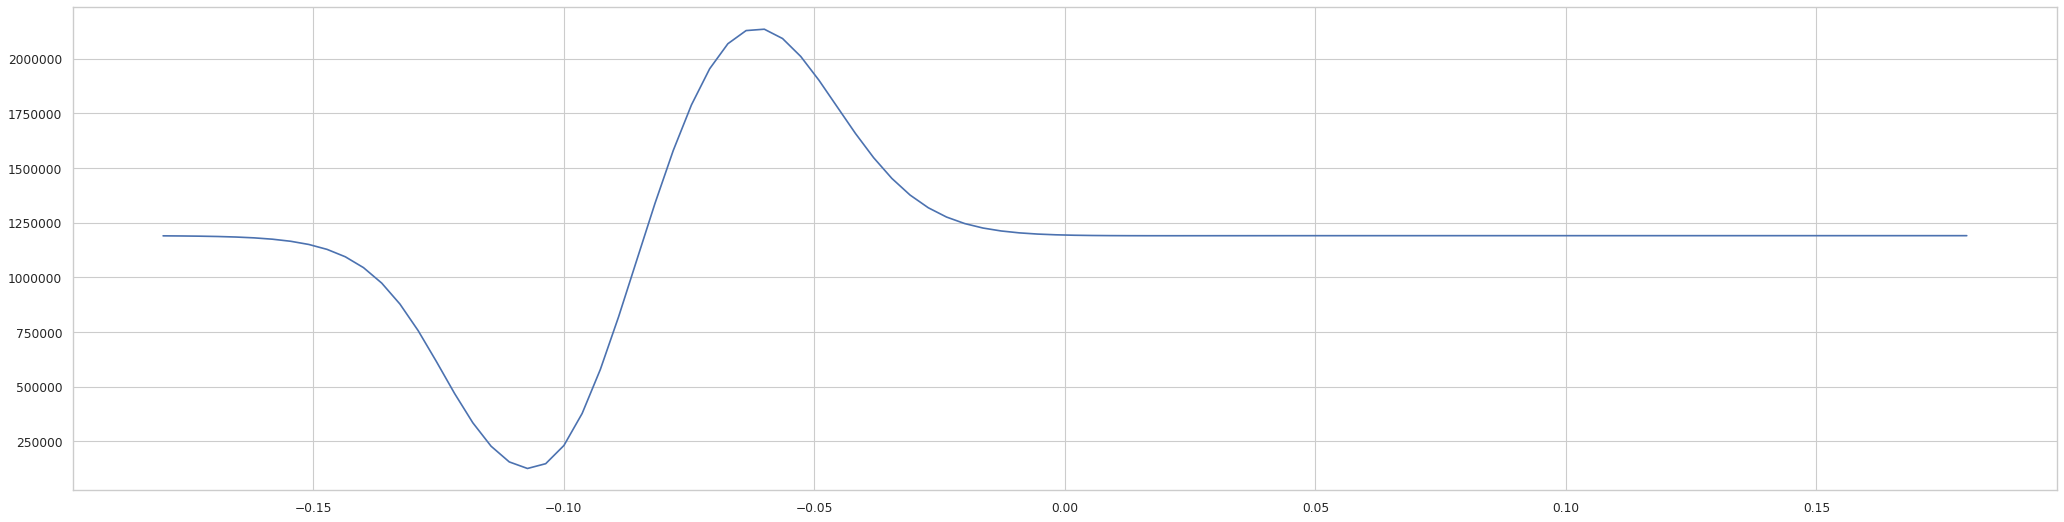

In [170]:
fig = plt.figure(figsize=(32,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)
ax.plot(l, np.array(r))

In [80]:
ll1.fc_follower.fit_.f_derivative.popt

array([ 81.47295037,   0.28022729,   0.36171861, -24.66000143, 553.03214225])

In [86]:
ll1.fc_follower.fit_

sigmoid+asymmetric+linear: seor: 48.67404775419193

In [ ]:
ll1.fc_follower.fit_.f_derivative.fitFunct_

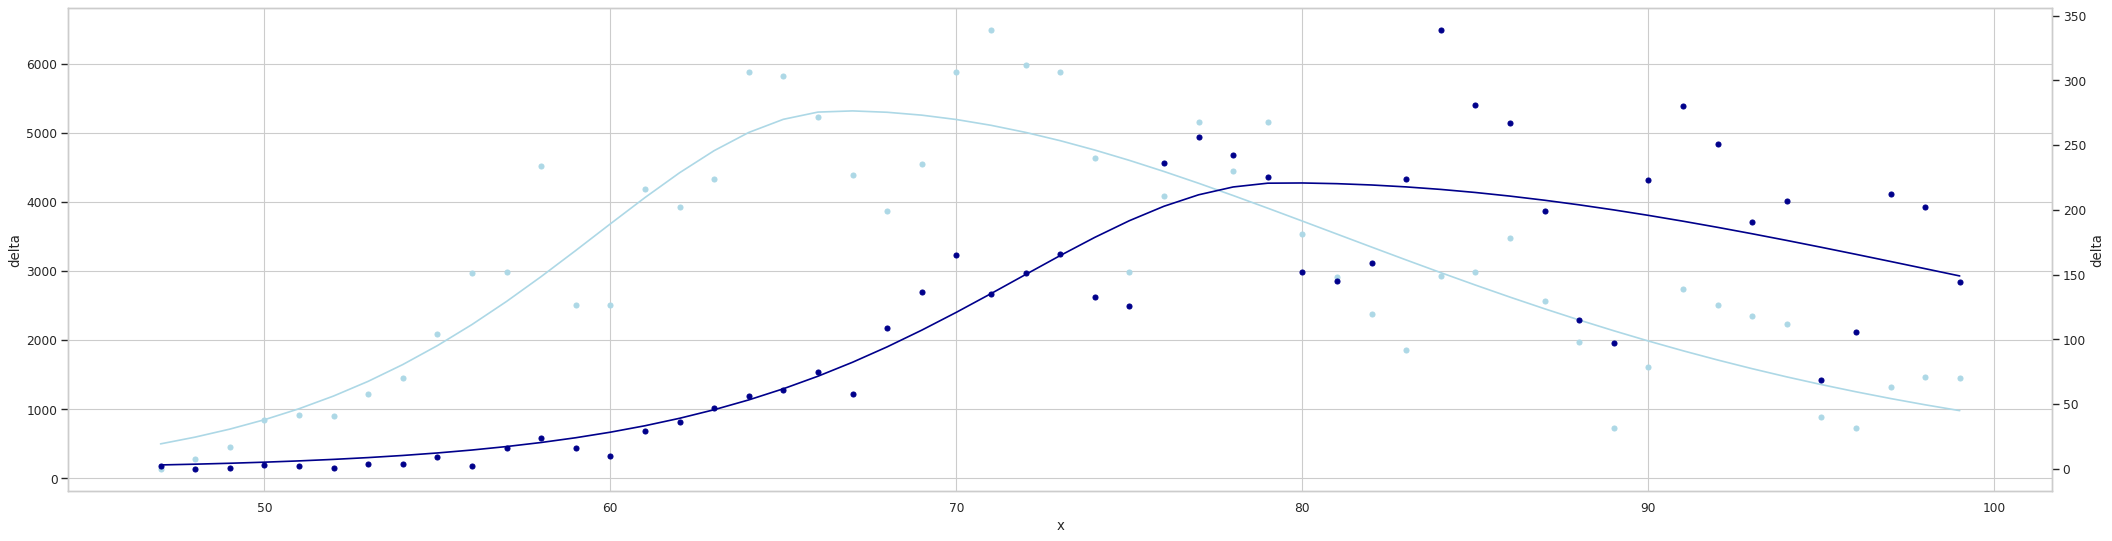

In [219]:
ll2 = covid19.LeadLagByShiftAndScale1(cbr_germany2.df['confirmed'], cbr_germany2.df['death'], first_date=pd.to_datetime('2020-03-09'))
ll2.fit()
ll2.plot_lead_lag()

In [220]:
ll2.fc_follower.fit_overview()

[exp: seor: 69.18374386079621, popt: [297.41034453   0.03337084],
 sigmoid: seor: 46.91781052836735, popt: [7484.20342724    0.12499867  -10.54501507],
 sigmoid+linear: seor: inf, popt: [ -0.58746231   0.30621553 -20.70191131 657.97371083],
 sigmoid+asymmetric: seor: 46.254648124590304, popt: [5083.88482701    0.17376745    0.06607757  -13.79477931],
 sigmoid+asymmetric+linear: seor: inf, popt: None]

In [192]:
ll2.fc_follower.fit_.f_derivative.popt

array([297.41034453,   0.03337084])

In [193]:
ll2.fc_follower.fit_

exp: seor: 69.18374386079621

In [210]:
lf = ll2.fc_follower.fit_choices[1]
print(lf.p0)
lf

[9081.0, 0.2, -10.0]


sigmoid: seor: inf, max asymptotic: 1959.8431430052103

In [215]:
lf.x

2020-03-09    47.0
2020-03-10    48.0
2020-03-11    49.0
2020-03-12    50.0
2020-03-13    51.0
2020-03-14    52.0
2020-03-15    53.0
2020-03-16    54.0
2020-03-17    55.0
2020-03-18    56.0
2020-03-19    57.0
2020-03-20    58.0
2020-03-21    59.0
2020-03-22    60.0
2020-03-23    61.0
2020-03-24    62.0
2020-03-25    63.0
2020-03-26    64.0
2020-03-27    65.0
2020-03-28    66.0
2020-03-29    67.0
2020-03-30    68.0
2020-03-31    69.0
2020-04-01    70.0
2020-04-02    71.0
2020-04-03    72.0
2020-04-04    73.0
2020-04-05    74.0
2020-04-06    75.0
2020-04-07    76.0
2020-04-08    77.0
2020-04-09    78.0
2020-04-10    79.0
2020-04-11    80.0
2020-04-12    81.0
2020-04-13    82.0
2020-04-14    83.0
2020-04-15    84.0
2020-04-16    85.0
2020-04-17    86.0
2020-04-18    87.0
2020-04-19    88.0
2020-04-20    89.0
2020-04-21    90.0
2020-04-22    91.0
2020-04-23    92.0
2020-04-24    93.0
2020-04-25    94.0
2020-04-26    95.0
2020-04-27    96.0
2020-04-28    97.0
Name: x, dtype: float64

In [216]:
lf1.x

index
2020-03-09     68.0
2020-03-10     69.0
2020-03-11     70.0
2020-03-12     71.0
2020-03-13     72.0
2020-03-14     73.0
2020-03-15     74.0
2020-03-16     75.0
2020-03-17     76.0
2020-03-18     77.0
2020-03-19     78.0
2020-03-20     79.0
2020-03-21     80.0
2020-03-22     81.0
2020-03-23     82.0
2020-03-24     83.0
2020-03-25     84.0
2020-03-26     85.0
2020-03-27     86.0
2020-03-28     87.0
2020-03-29     88.0
2020-03-30     89.0
2020-03-31     90.0
2020-04-01     91.0
2020-04-02     92.0
2020-04-03     93.0
2020-04-04     94.0
2020-04-05     95.0
2020-04-06     96.0
2020-04-07     97.0
2020-04-08     98.0
2020-04-09     99.0
2020-04-10    100.0
2020-04-11    101.0
2020-04-12    102.0
2020-04-13    103.0
2020-04-14    104.0
2020-04-15    105.0
2020-04-16    106.0
2020-04-17    107.0
2020-04-18    108.0
2020-04-19    109.0
2020-04-20    110.0
2020-04-21    111.0
2020-04-22    112.0
2020-04-23    113.0
2020-04-24    114.0
2020-04-25    115.0
2020-04-26    116.0
2020-04-27    

In [195]:
lf.p0 = [9081.0, 0.2, -10.0]
# lf.p0 = [9081.0, 0.1, -10.0]
# lf.p0 = [7484.20342724, 0.12499867, -10.54501507]
# lf.p0 = [9081.0, 0.12, -10.0]
lf.p0

[9081.0, 0.2, -10.0]

In [196]:
bounds=[(1000.0,np.inf),(0.01,np.inf),(-np.inf, -0.1)]
bl = [i[0] for i in bounds]
bu = [i[1] for i in bounds]
bounds_ = (bl, bu)
bounds_

([1000.0, 0.01, -inf], [inf, inf, -0.1])

In [197]:
covid19.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  lf.p0, 'xyz', bounds=bounds)

 /home/local/cs/workspaces/covid-19-data-analysis/covid19.py:1499: UserWarning:Exception in curve_fit: Optimal parameters not found: The maximum number of function evaluations is exceeded.


xyz: seor: inf, popt: None

In [203]:
# lf.fit()
# lf.f_derivative.popt
# popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  lf.p0, bounds=bounds_, max_nfev=5000, xtol=0.01, diff_step=0.00001, method='trf')# maxfev=1000, 
# popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  lf.p0, bounds=bounds_)# maxfev=1000, 
popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  lf.p0)# maxfev=1000, 
popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  popt, bounds=bounds_)# maxfev=1000, 
#popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy, popt)#
# popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  popt, bounds=bounds_)#
# popt, pcov = scipy.optimize.curve_fit(covid19.fitSigDerivative, lf.x, lf.dy,  popt, bounds=bounds_)#
popt

array([7484.16708512,    0.12499968,  -10.54509974])

In [163]:
res = scipy.optimize.minimize(covid19.fn_minimize(covid19.fitSigDerivative, lf.x, lf.dy), lf.p0, method='L-BFGS-B')  # , bounds=bounds, options = dict(maxiter=100)
res

      fun: 1190352.0
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
   status: 0
  success: True
        x: array([9080.99999807,    1.19985544,   -9.9829972 ])

In [164]:
covid19.fn_minimize(covid19.fitSigDerivative, lf.x, lf.dy)([9081.0, 0.2, -10.0])

1193179.5788537462

In [165]:
np.linspace(-0.2,0.2,20)

array([-0.2       , -0.17894737, -0.15789474, -0.13684211, -0.11578947, -0.09473684, -0.07368421, -0.05263158, -0.03157895, -0.01052632,  0.01052632,  0.03157895,  0.05263158,  0.07368421,  0.09473684,  0.11578947,  0.13684211,  0.15789474,  0.17894737,  0.2       ])

In [168]:
nl = 100
la = np.array([9081.0, 0.2, -10.0]).reshape(1,-1) * np.ones((nl,1), dtype=np.float)
l = np.linspace(-0.18,0.18,nl)
la[:,1] = la[:,1] + l
la[:3,:]

array([[9081.        ,    0.02      ,  -10.        ],
       [9081.        ,    0.02363636,  -10.        ],
       [9081.        ,    0.02727273,  -10.        ]])

In [169]:
r = []
for p in la:
    r += [covid19.fn_minimize(covid19.fitSigDerivative, lf.x, lf.dy)(p)]
r[:3]

[1189563.818100504, 1188991.327899081, 1188056.7776435984]

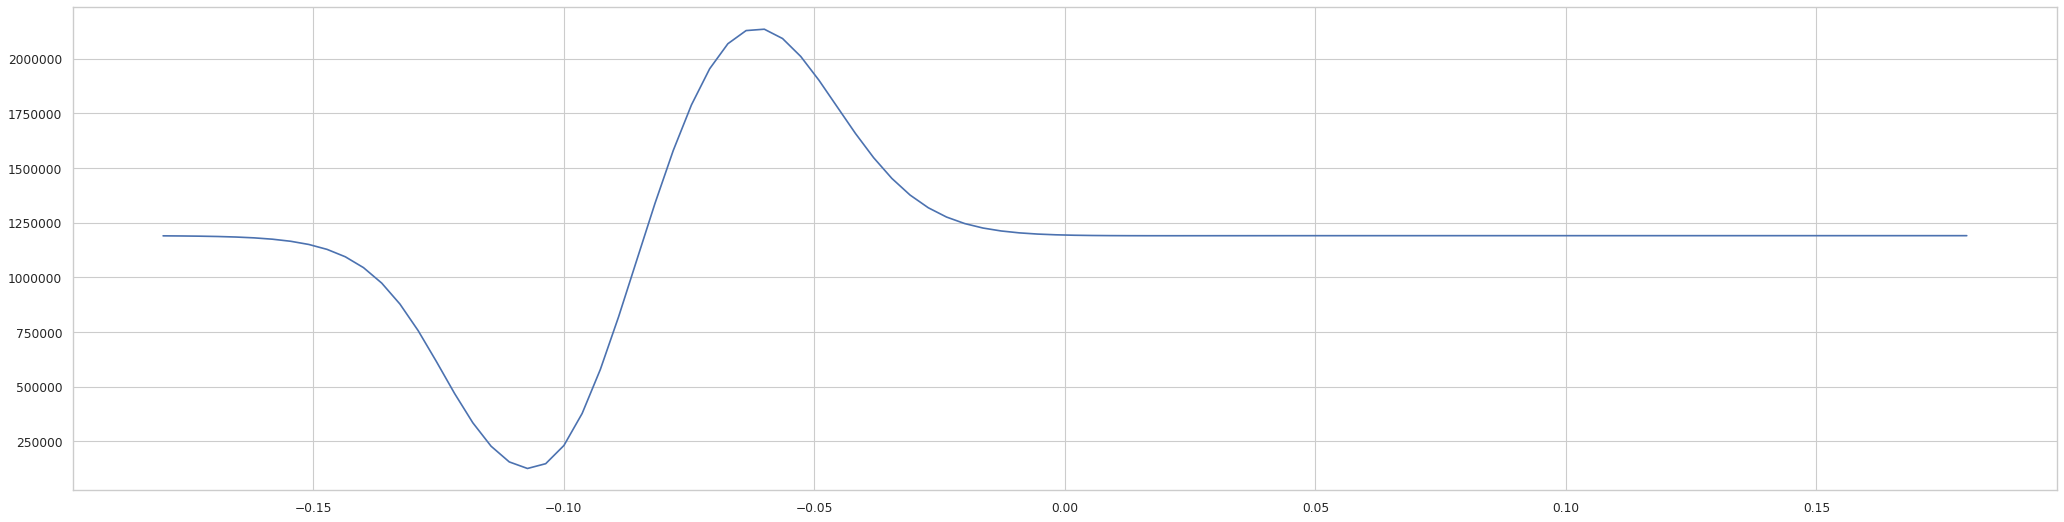

In [170]:
fig = plt.figure(figsize=(32,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)
ax.plot(l, np.array(r))

In [56]:
# llfns = [covid19.LeadLagByShiftAndScale1, covid19.LeadLagByShiftAndScale2, covid19.LeadLagByShiftAndScale3]
llfns = [covid19.LeadLagByShiftAndScale1]
lls = []

for llfn in llfns:
    ll = llfn(cbr_germany1.df['confirmed'], cbr_germany1.df['death'], first_date=pd.to_datetime('2020-03-09'))
    ll.fit()
    lls += [ll]

In [57]:
[ll.shift_and_scale_popt for ll in lls]

[array([ 0.04552086, 13.69860536])]

In [58]:
lls[0].fc_leader.fit_choices

[exp: seor: 1760.5553068583756,
 sigmoid: seor: 854.3160393380949, max asymptotic: 156140.01449179018,
 sigmoid+linear: seor: 794.9791160392656, max asymptotic: 124054.47782618979,
 sigmoid+asymmetric: seor: 792.3306428051199, max asymptotic: 170363.99325246108,
 sigmoid+asymmetric+linear: seor: 797.5698159522316]

In [59]:
lls[0].fc_follower.fit_choices

[exp: seor: 69.18374386079621,
 sigmoid: seor: 46.91781052836735, max asymptotic: 6631.907334076004,
 sigmoid+linear: seor: inf, max asymptotic: -0.5874623060907262,
 sigmoid+asymmetric: seor: 46.254648124590304, max asymptotic: 10623.08698553716,
 sigmoid+asymmetric+linear: seor: inf]

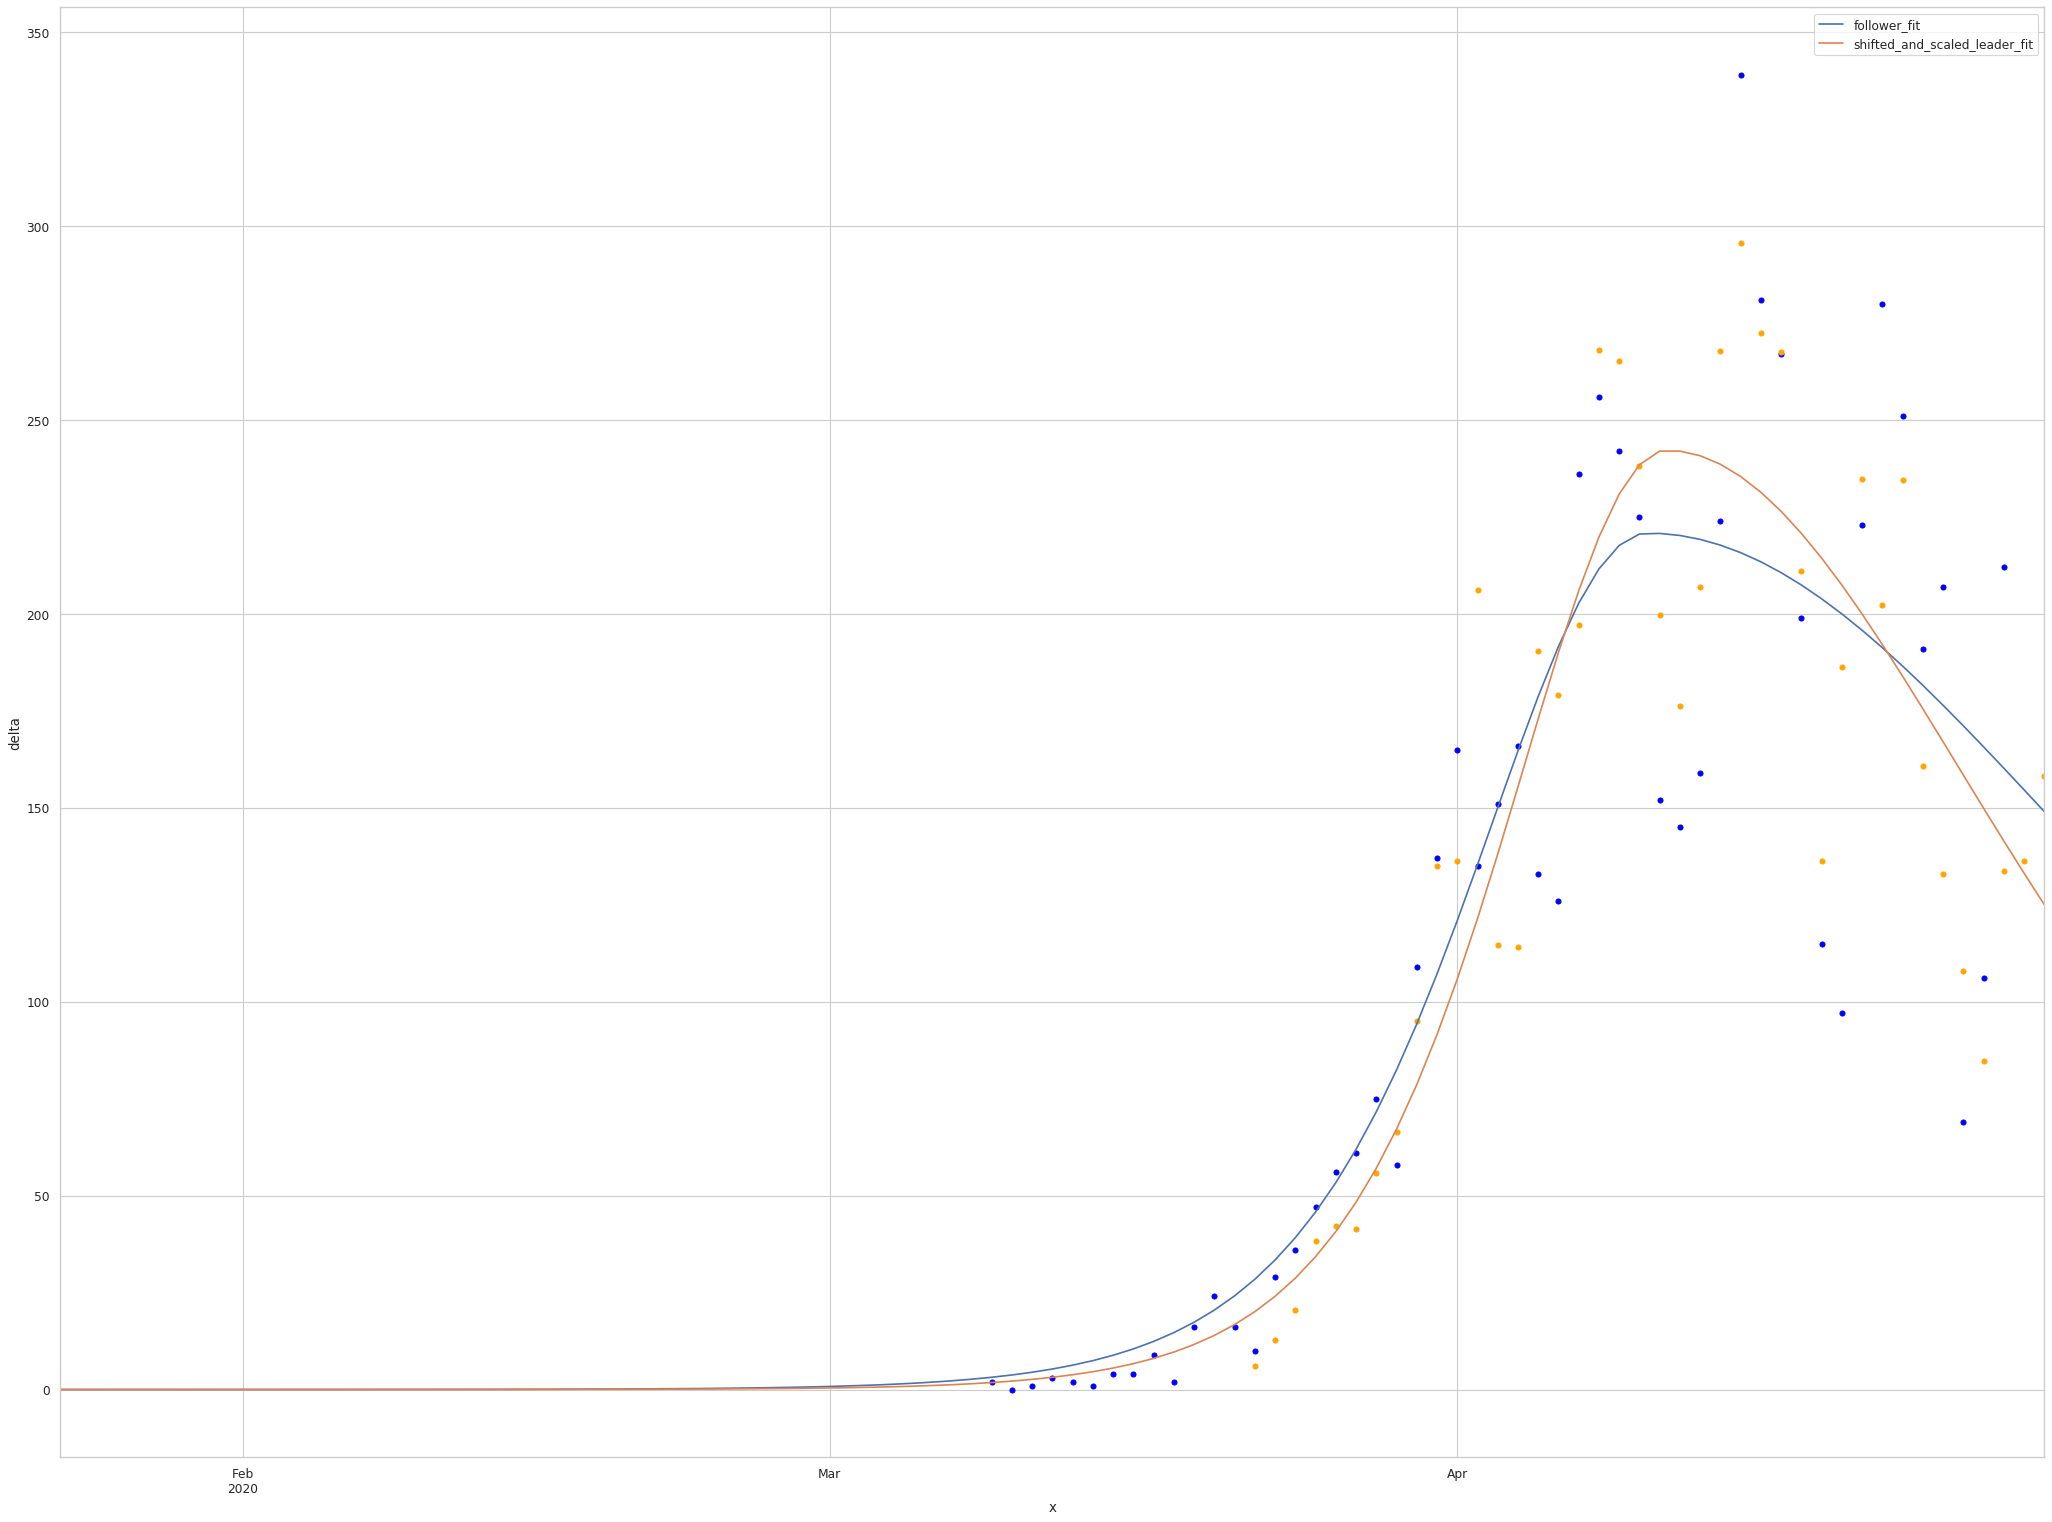

In [60]:
fig = plt.figure(figsize=(32,8*3), dpi=80, facecolor='w', edgecolor='k')
l = len(lls)
for i, ll in enumerate(lls):
    ax = plt.subplot(l,1, i+1)
    ll.plot(ax=ax)

In [61]:
lls[0].leader_fit_df0.head()

,x,total,delta
2020-03-09,47.0,1176,136.0
2020-03-10,48.0,1457,281.0
2020-03-11,49.0,1908,451.0
2020-03-12,50.0,2750,842.0
2020-03-13,51.0,3675,925.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


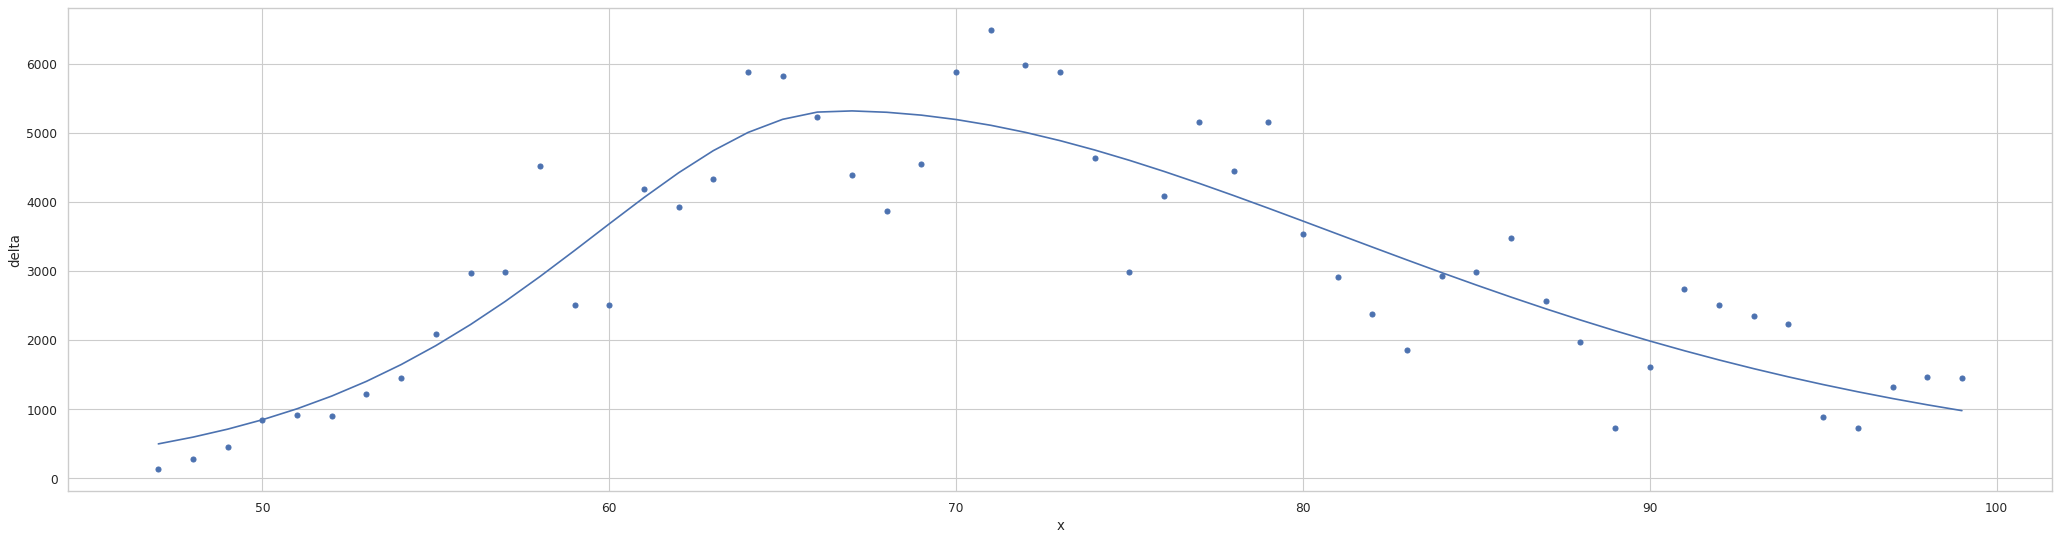

In [62]:
fig = plt.figure(figsize=(32,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)
lls[0].leader_fit_df0.plot.scatter(ax=ax, x='x', y='delta')
ax.plot(lls[0].leader_fit_df0.x, lls[0].fn_leader_predict_dy(lls[0].leader_fit_df0.x))

In [63]:
lls[0].fc_leader.fit_

sigmoid+asymmetric: seor: 792.3306428051199, max asymptotic: 170363.99325246108

In [64]:
lls[0].follower_fit_df0.head()

,x,total,delta
2020-03-09,47.0,2,2.0
2020-03-10,48.0,2,0.0
2020-03-11,49.0,3,1.0
2020-03-12,50.0,6,3.0
2020-03-13,51.0,8,2.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


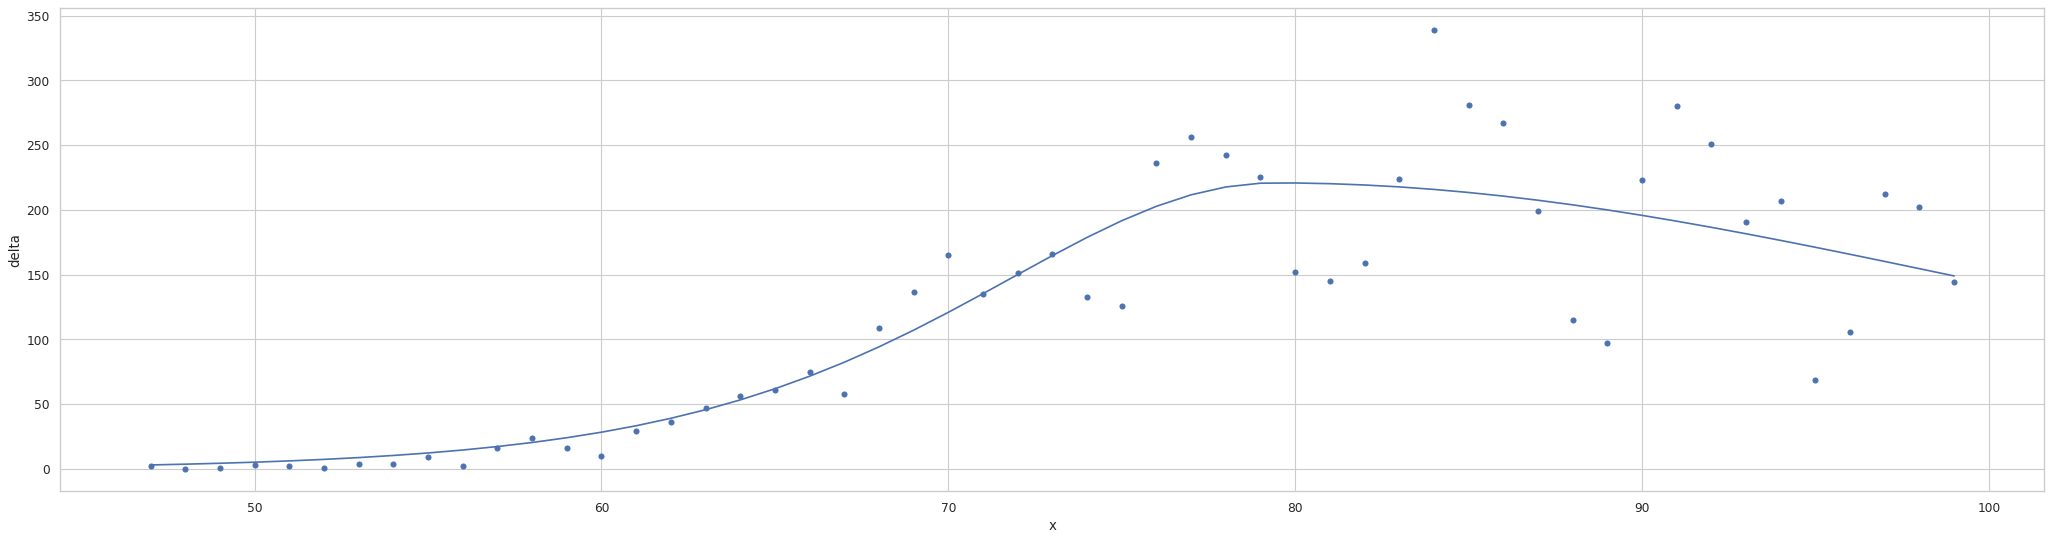

In [65]:
fig = plt.figure(figsize=(32,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)
lls[0].follower_fit_df0.plot.scatter(ax=ax, x='x', y='delta')
ax.plot(lls[0].follower_fit_df0.x, lls[0].fn_follower_predict_dy(lls[0].follower_fit_df0.x))

In [45]:
lls[0].fc_follower.fit_

sigmoid+asymmetric+linear: seor: 48.67404775419193

In [46]:
lls[0].fit_df0 

,follower_fit,shifted_and_scaled_leader_fit
index,,
2020-01-02,4.591390e-09,5.719504e-08
2020-01-03,6.076386e-09,7.264376e-08
2020-01-04,8.041675e-09,9.226526e-08
2020-01-05,1.064260e-08,1.171866e-07
2020-01-06,1.408474e-08,1.488394e-07
...,...,...
2020-04-26,2.000313e+02,1.791063e+02
2020-04-27,2.000346e+02,1.728844e+02
2020-04-28,2.000368e+02,1.666036e+02


In [47]:
lls[0].follower_fit_df[['delta']].head()

,delta
index,
2020-03-09,2.0
2020-03-10,0.0
2020-03-11,1.0
2020-03-12,3.0
2020-03-13,2.0


In [48]:
lls[0].scaled_and_shifted_leader_df

,x,delta
index,,
2020-03-09,2020-03-31 11:25:09.171443,82.068632
2020-03-10,2020-04-01 11:25:09.171443,105.861854
2020-03-11,2020-04-02 11:25:09.171443,132.687043
2020-03-12,2020-04-03 11:25:09.171443,149.748274
2020-03-13,2020-04-04 11:25:09.171443,186.337419
...,...,...
2020-06-02,2020-06-24 11:25:09.171443,NaN
2020-06-03,2020-06-25 11:25:09.171443,NaN
2020-06-04,2020-06-26 11:25:09.171443,NaN


In [49]:
lls[0].shift_and_scale_popt

array([ 0.05138925, 22.4758006 ])

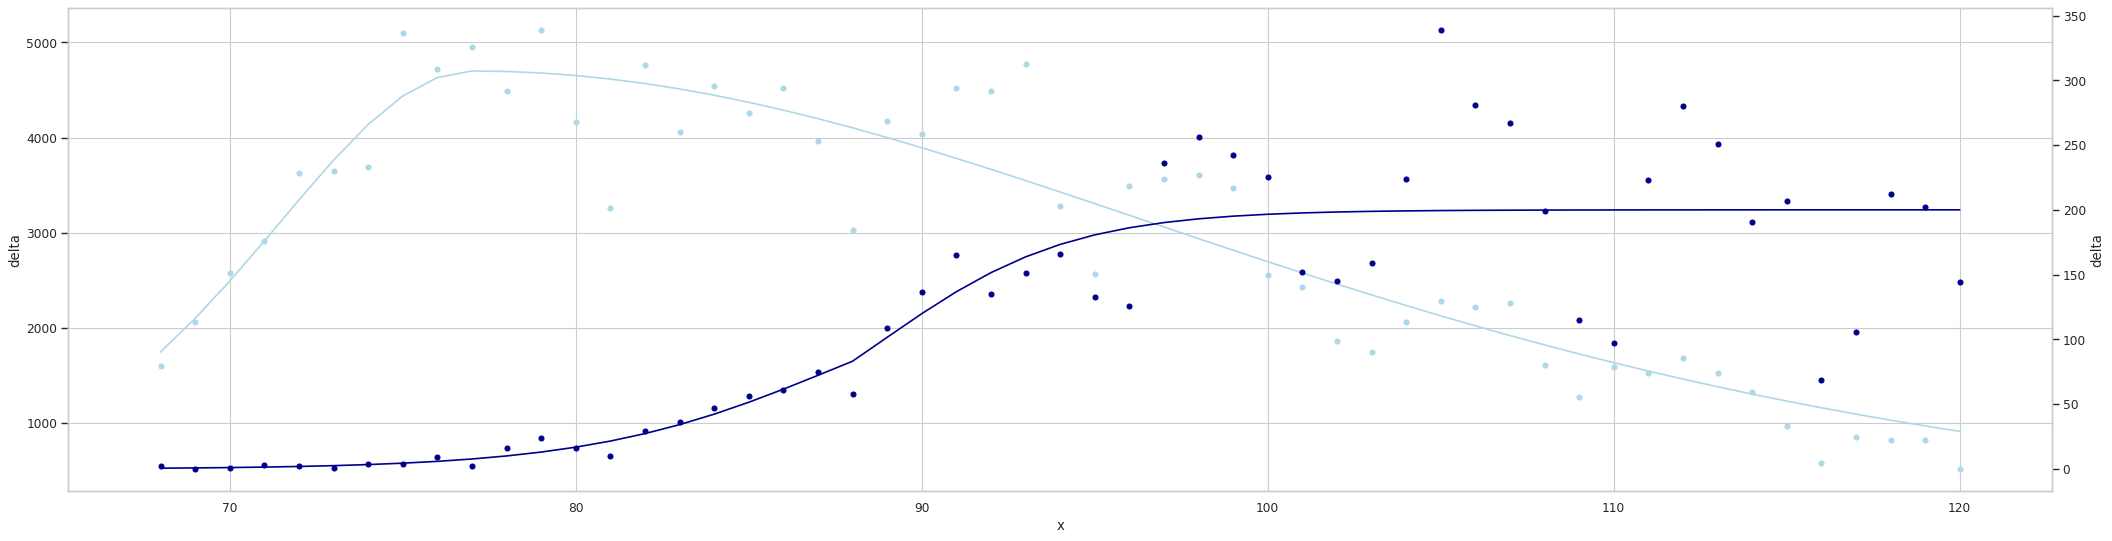

In [50]:
lls[0].plot_lead_lag()

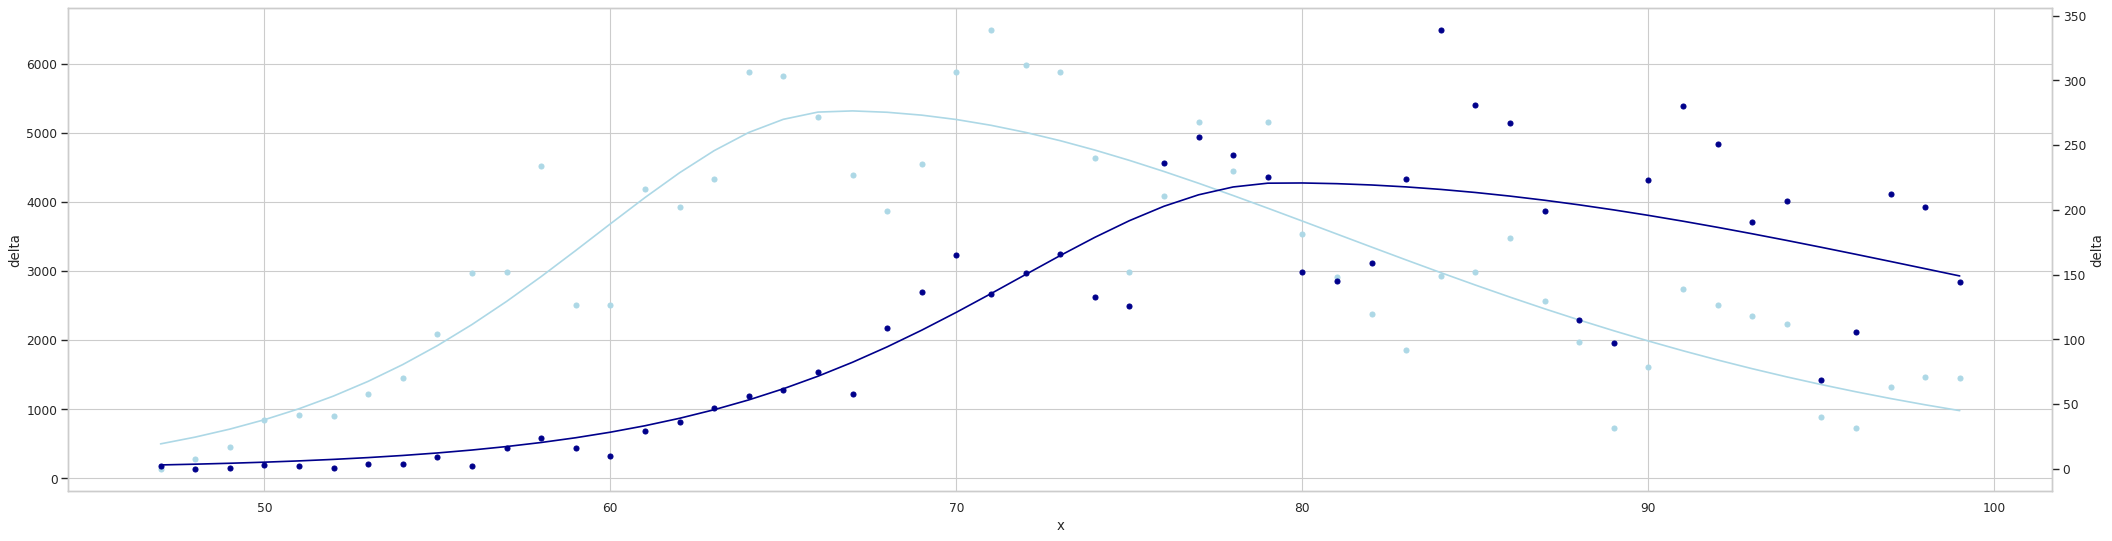

In [67]:
lls[0].plot_lead_lag()

In [51]:
lls[0].fc_follower.fit_overview()

[exp: seor: 69.18374385059509, popt: [147.57754552   0.03337063],
 sigmoid: seor: inf, popt: [5032857.68605048      -3.3351127      795.75265106],
 sigmoid+linear: seor: inf, popt: [ -0.6056265    0.30614541 -27.12621583 658.1344125 ],
 sigmoid+asymmetric: seor: 159.1434519478326, popt: [9080.99999758    1.15365413    0.50014865   -9.97867877],
 sigmoid+asymmetric+linear: seor: 48.67404775419193, popt: [ 81.47295037   0.28022729   0.36171861 -24.66000143 553.03214225]]

In [68]:
lls[0].fc_follower.fit_.p0

array([7484.20342724,    0.12499867,    0.12499867,  -10.54501507])

CFR via Survival analysis: 4.59 (lower: 4.48, upper:4.7), CFR via shift and scale: 4.39 (time delay between infection and death: 13.42 days)


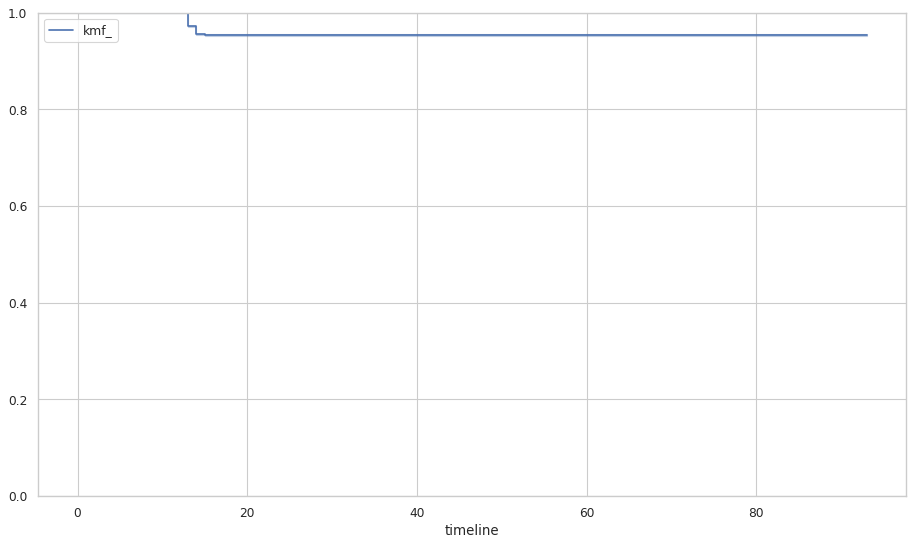

In [52]:
country_name, first_date, init_add = 'Germany', pd.to_datetime('2020-03-09'), 0.0
germany_mortality_analysis = covid19.MortalityAnalysis(country_name, first_date=first_date, init_add=init_add)
germany_mortality_analysis.fit()
print(germany_mortality_analysis.print_death_rate())
germany_mortality_analysis.plot()